In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

# Startups

In [51]:
data  = pd.read_csv(r"F:\Data Science\Assignments\5.Multi Linear Regression\50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.rename({'R&D Spend': "RDS", 'Administration': 'Admin', 'Marketing Spend' : 'MKTS'}, axis=1, inplace = True)

In [5]:
data.head()

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   Admin   50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.describe()

,RDS,Admin,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.isnull().sum()

RDS       0
Admin     0
MKTS      0
State     0
Profit    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.corr()

,RDS,Admin,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


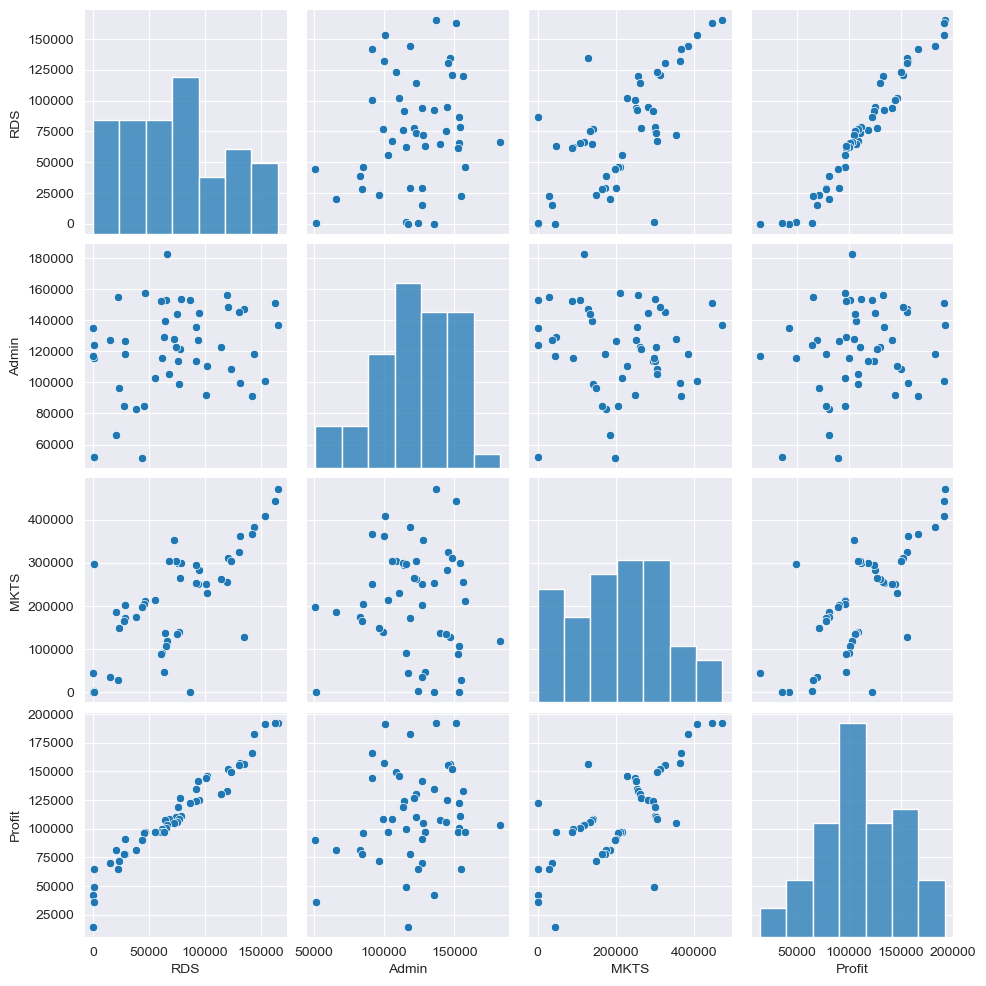

In [11]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

## Model Building and Testing

In [12]:
model = smf.ols('Profit~ RDS+Admin+MKTS', data=data).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        17:12:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MKTS             0.027228
dtype: float64

In [15]:
model.tvalues

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MKTS          1.655077
dtype: float64

In [16]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MKTS         1.047168e-01
dtype: float64

In [17]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [18]:
# Calculating VIF values
rsqr_rds = smf.ols('RDS~ Admin + MKTS', data = data).fit().rsquared
vif_rds = 1/(1-rsqr_rds)

rsqr_admin = smf.ols('Admin~ RDS + MKTS', data = data).fit().rsquared
vif_admin = 1/(1-rsqr_admin)

rsqr_MKTS = smf.ols('MKTS~ Admin + RDS', data = data).fit().rsquared
vif_MKTS = 1/(1-rsqr_MKTS)

In [19]:
vif_data = pd.DataFrame({"Variable" : ['RDS', 'Admin', 'MKTS'], 'VIF_values': [vif_rds , vif_admin, vif_MKTS]})

vif_data

,Variable,VIF_values
0,RDS,2.468903
1,Admin,1.175091
2,MKTS,2.326773


In [20]:
# Residual Anlysis
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')

plt.title("Normal Q-Q plot of residual")

Text(0.5, 1.0, 'Normal Q-Q plot of residual')

In [21]:
# Checking index postion of outlier

np.where(model.resid<-30000)

(array([49], dtype=int64),)

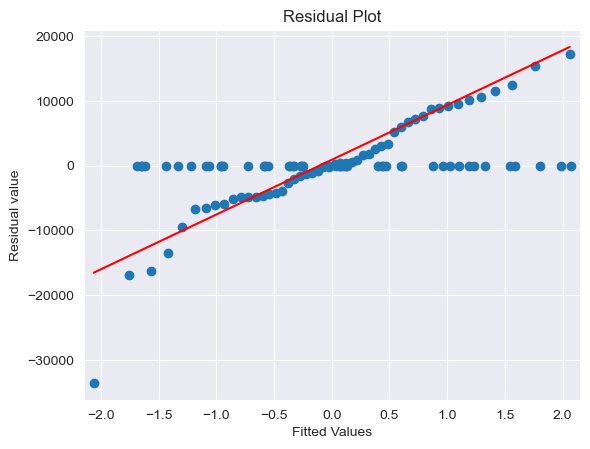

In [22]:
# checking for Homoscedasticity
fitted_values= StandardScaler().fit_transform(pd.DataFrame(model.fittedvalues))
residual_values = StandardScaler().fit_transform(pd.DataFrame(model.resid))


plt.scatter(fitted_values, residual_values)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residual value")
plt.show()

# Residual vs Regressor

eval_env: 1


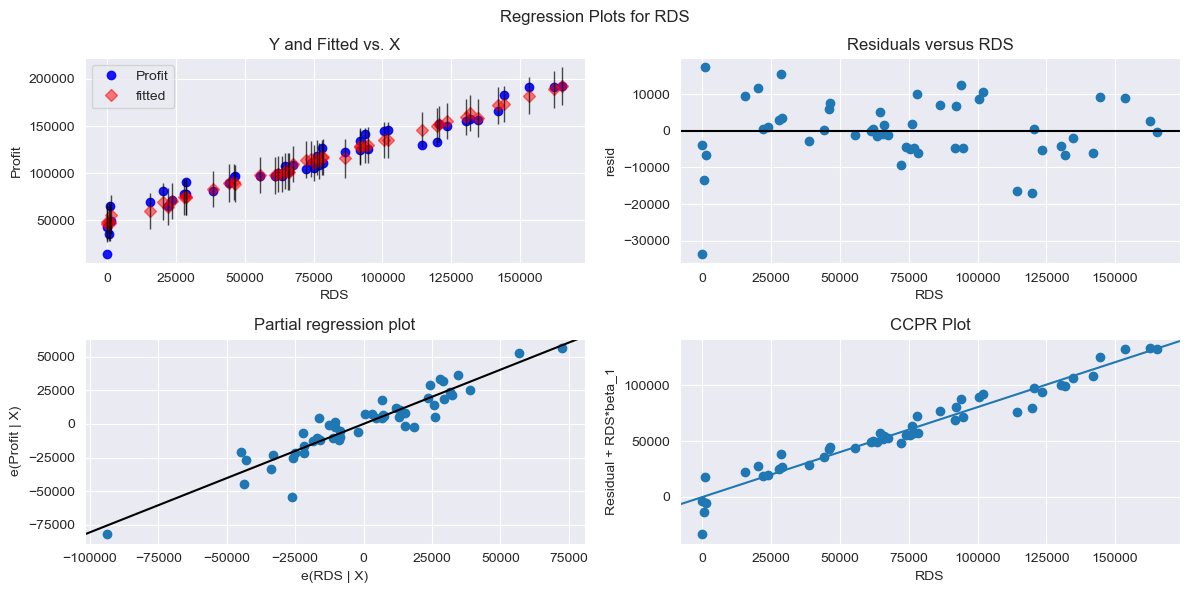

In [23]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


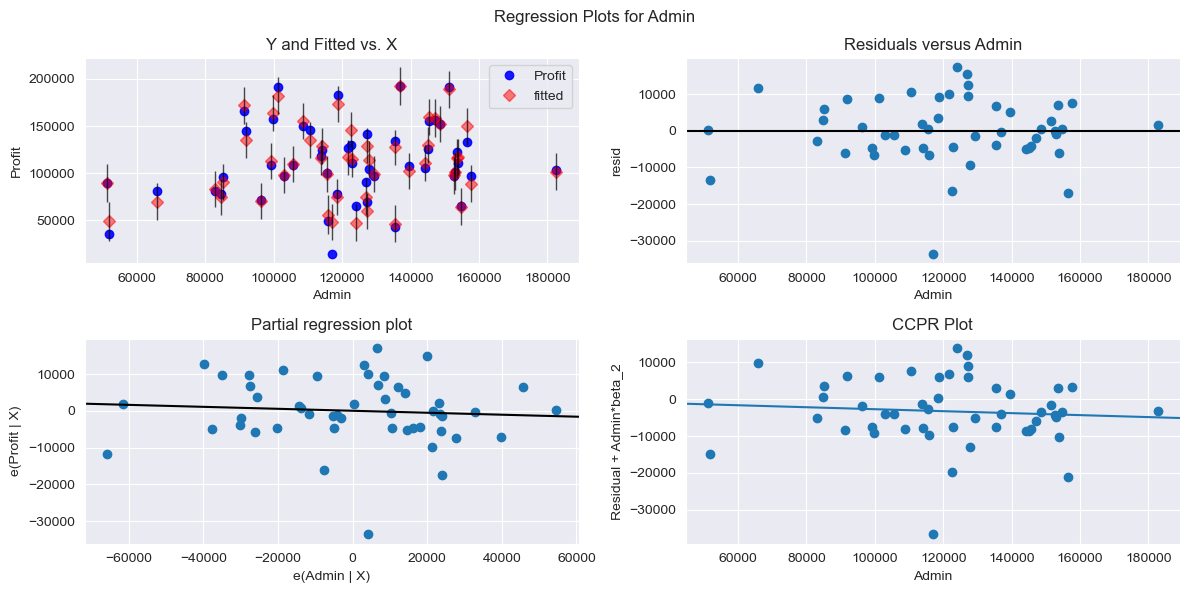

In [24]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model,'Admin', fig=fig)
plt.show()

eval_env: 1


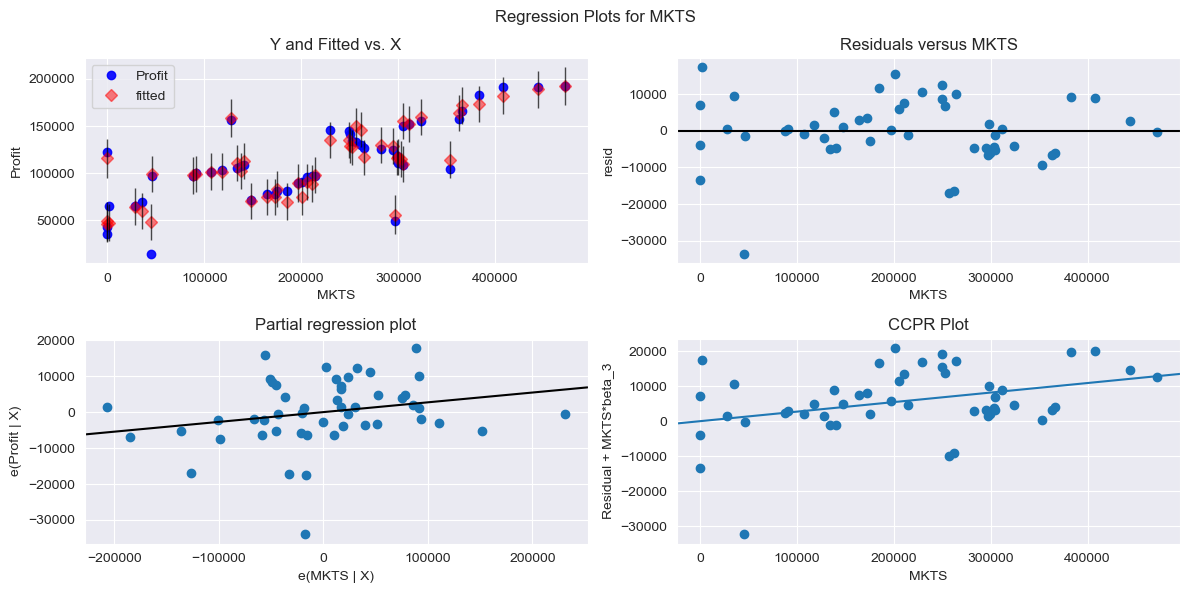

In [25]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model,'MKTS', fig=fig)
plt.show()

# Detecting outlier using cooks distance

In [26]:
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

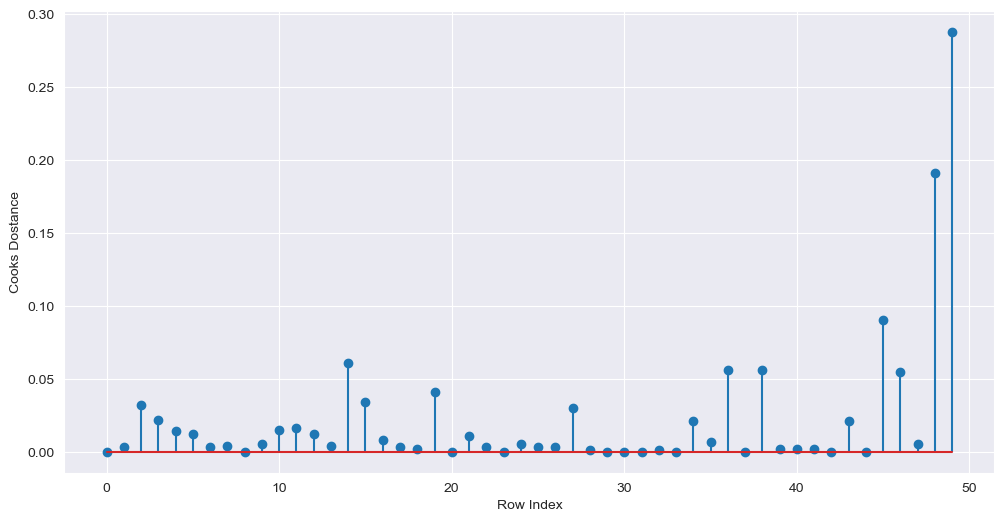

In [27]:
fig = plt.subplots(figsize=(12,6))

plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Dostance')
plt.show()

In [28]:
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

In [29]:
data[data.index.isin([49])]

,RDS,Admin,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


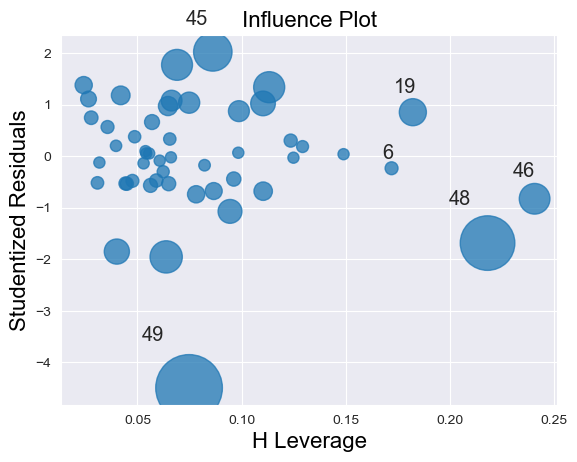

In [30]:
influence_plot(model)
plt.show()

In [31]:
k = data.shape[1]
n = data.shape[0]

leverage = 3*((k+1)/n)
leverage


0.36

# Improving Model

In [32]:
df = data.drop(data.index[49], axis = 0).reset_index()
df

,index,RDS,Admin,MKTS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
df.drop(['index'], axis=1 , inplace = True)
df

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
model1 = smf.ols('Profit~ RDS+Admin+MKTS', data = df).fit()

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        17:12:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model1.rsquared, model1.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [37]:
model.aic, model1.aic

(1058.7714985998055, 1020.5652974526367)

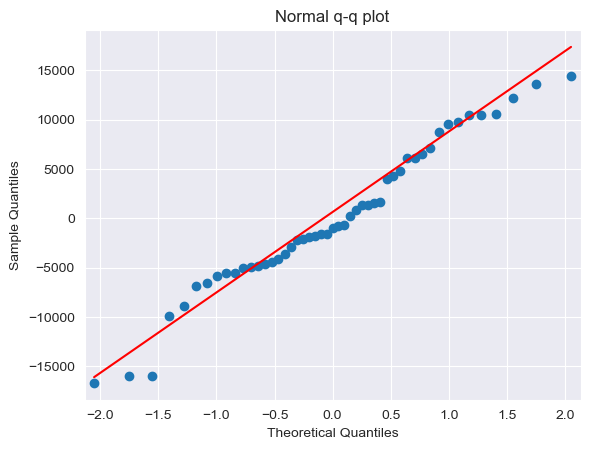

In [38]:
qqplot = sm.qqplot(model1.resid, line="q")
plt.title("Normal q-q plot")
qqplot

In [39]:
(c, _) = model1.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

In [1]:
fig = plt.subplots(figsize=(12,6))

plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

NameError: name 'plt' is not defined

In [41]:
np.argmax(c),np.max(c)

(48, 0.39274420556321554)

In [42]:
df[df.index.isin([48])]

,RDS,Admin,MKTS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


# Model Prediction

In [43]:
new_data=pd.DataFrame({"RDS":6000 , "Admin":10000, "MKTS":20000},index=[0])
model1.predict(new_data)

0    57363.109312
dtype: float64

# Table containing R^2 value for each prepared model

In [44]:
d2 = pd.DataFrame({'prepared_model' : ['model','model1'] , 'Rsquared Values' :[model.rsquared, model1.rsquared]})

In [45]:
d2

,prepared_model,Rsquared Values
0,model,0.950746
1,model1,0.961316
